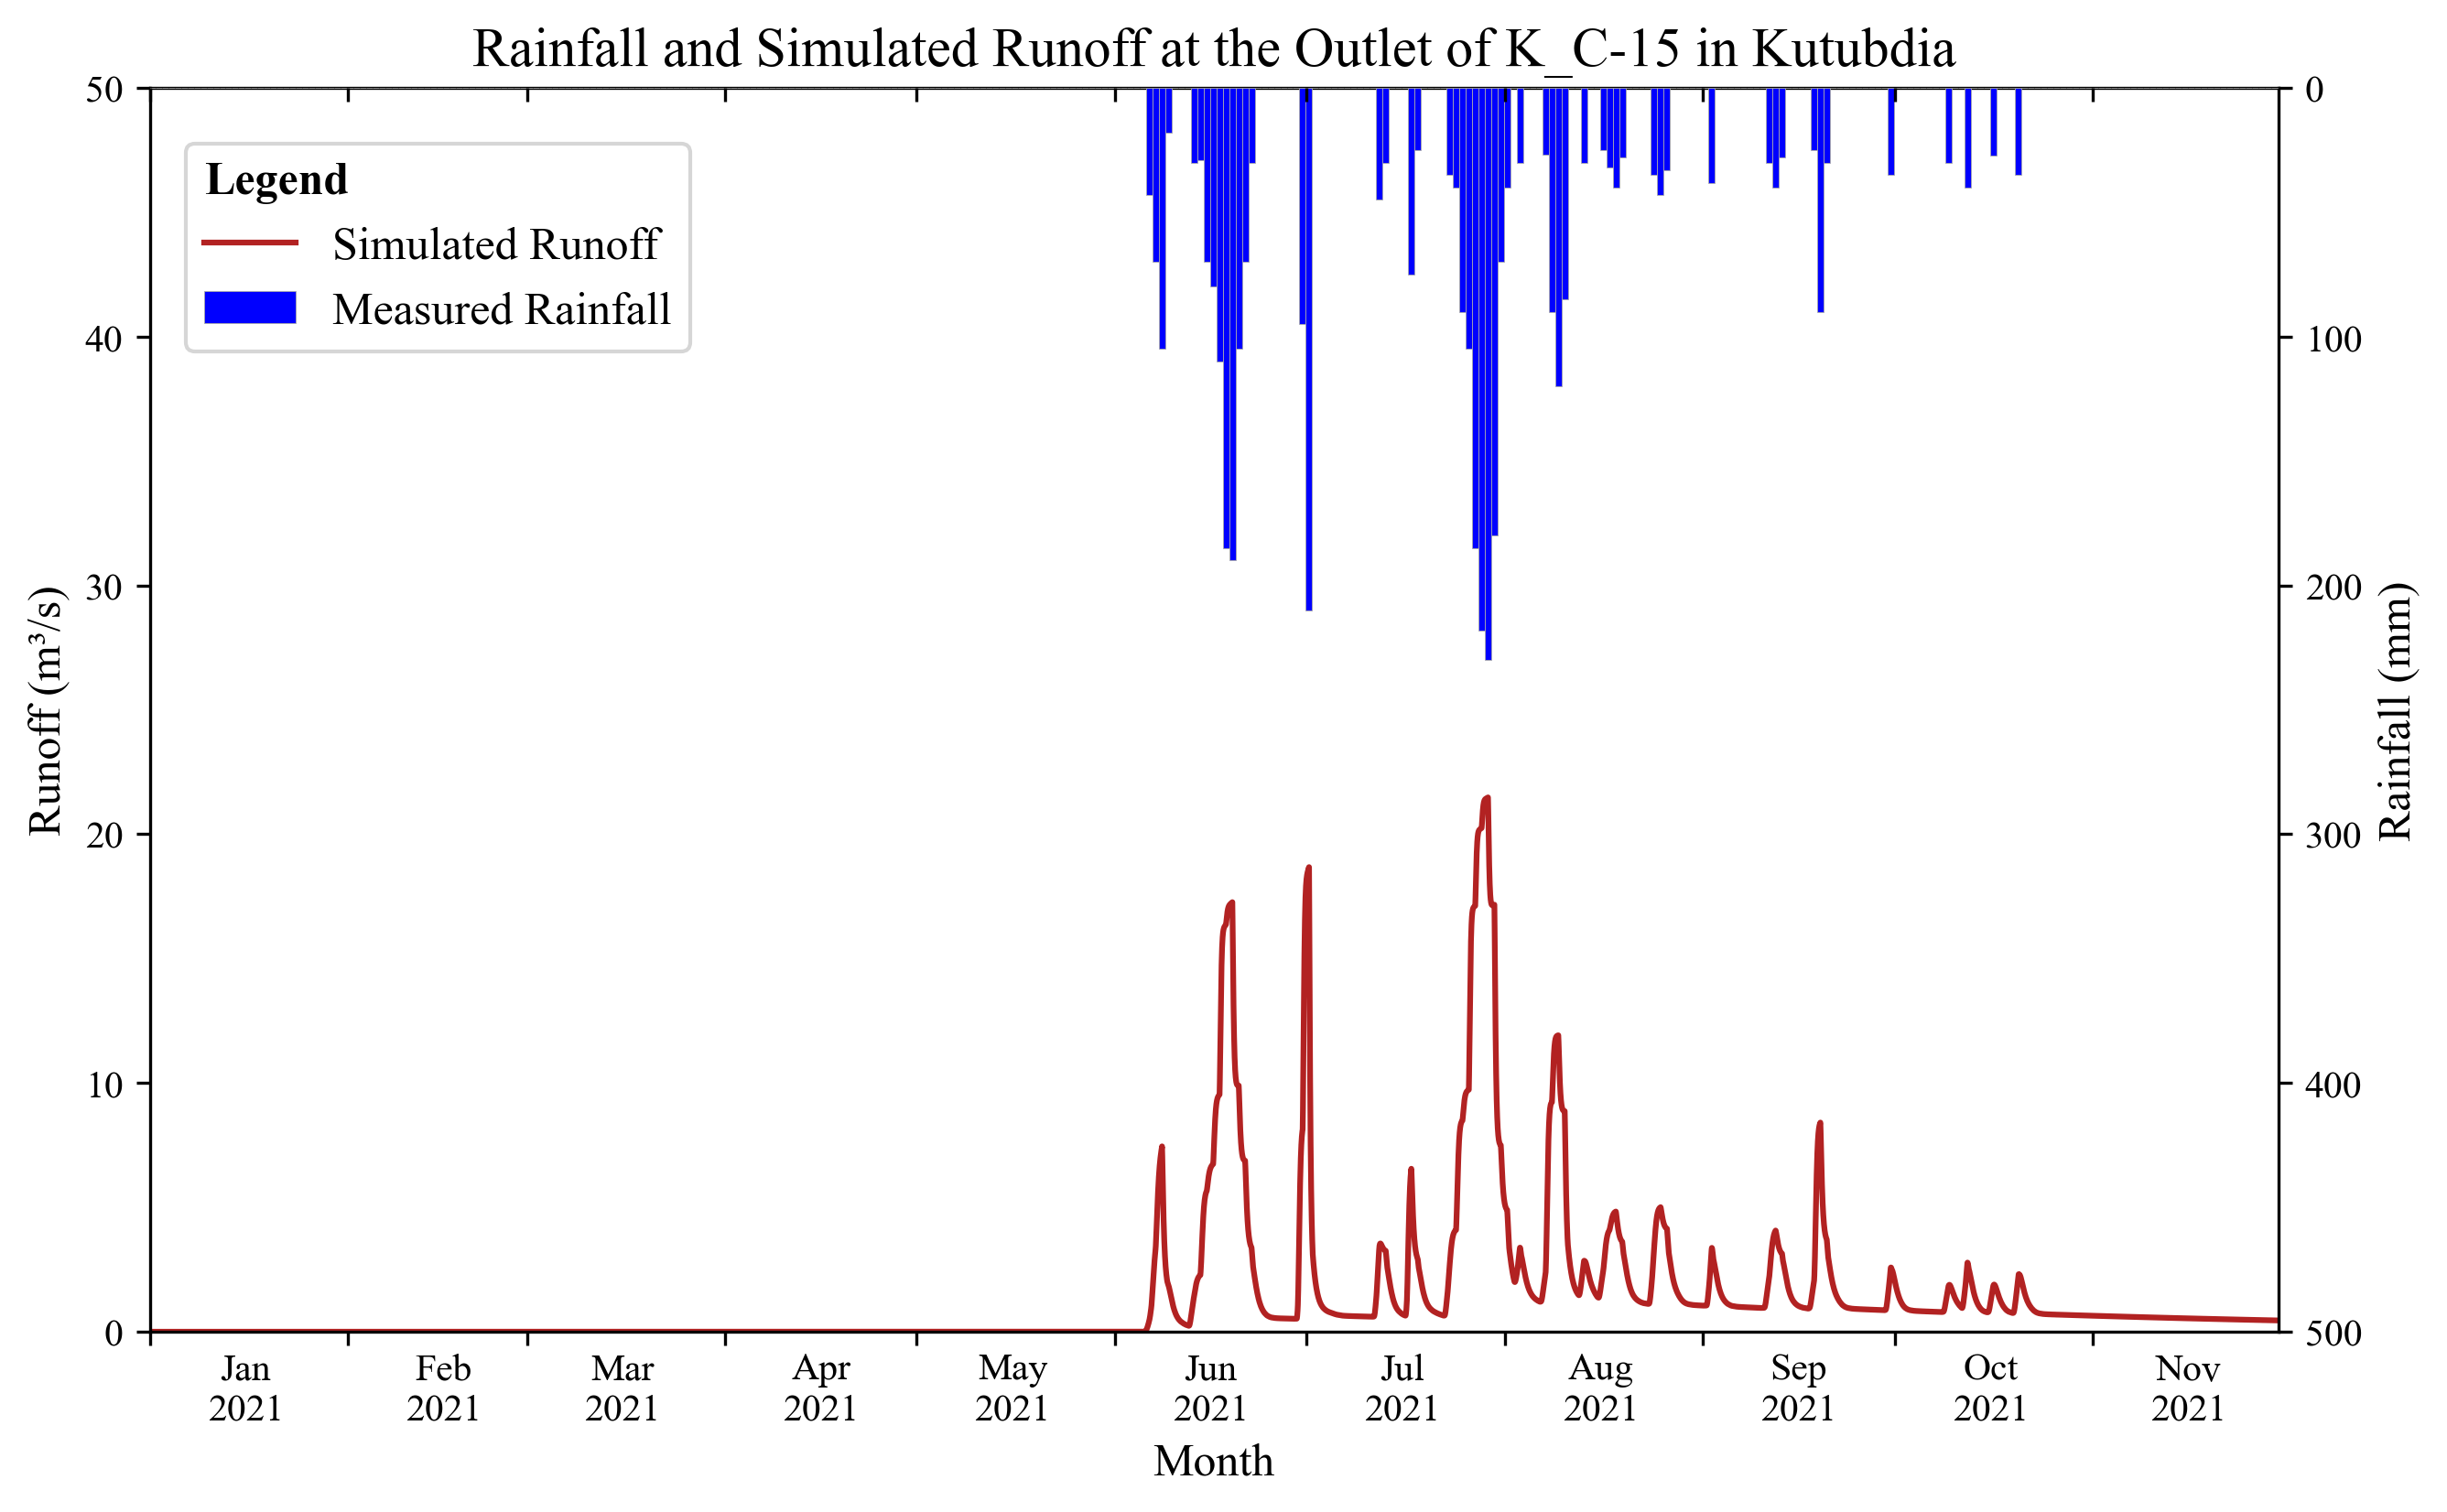

In [29]:
import mikeio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as dates
import matplotlib.ticker as ticker
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter

# Reading the 
sim_df = pd.read_excel(r"G:\MJI\SKZ\Script\Rainfall_and_Runoff_Plot\Kutubdia Existing (2021) Simulated.xlsx")
rainfall_df = pd.read_excel(r"G:\MJI\SKZ\Script\Rainfall_and_Runoff_Plot\Kutubdia_Rainfall(2021).xlsx")

font = {'family' : 'Times New Roman',              
        'weight' : 'normal',  
        'size'   : 12}

plt.rc('font',**font)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

fig=plt.figure(figsize=(10,6), dpi = 300)
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

# PLOTTING SIMULATED RUNOFF
plot1 = ax.plot(sim_df['Date Time'], sim_df['Simulated'], label='Simulated Runoff', color = 'firebrick')
ax.set_xlabel("Month", color="k")
# ax.set_ylabel("Runoff ($m^3$/s)", color="C0")
ax.set_ylabel("Runoff (m\u00b3/s)", color="k")
ax.tick_params(axis='x', colors="k")
ax.tick_params(axis='y', colors="k")
ax.set_yticks(np.arange(0,50+1,10))
ax.set_ylim(0, 50)
ax.set_xlim(np.datetime64('2021-01-01'), np.datetime64('2021-11-30'))
ax.xaxis.set_major_locator(MonthLocator(bymonthday=1))
# ax.xaxis.set_major_formatter(md.DateFormatter('%b\n%Y'))
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=16))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b\n%Y'))

# Remove the tick lines
ax.tick_params(axis='x', which='minor', tick1On=False, tick2On=False)

for label in ax.get_xticklabels(minor=True):
    label.set_horizontalalignment('center')
    
    
# PLOTTING MEAUSURED RAINFALL
plot2 = ax2.bar(rainfall_df['Date Time'], rainfall_df['Rainfall'], label='Measured Rainfall',color='blue', width = 1, 
                alpha = 1, edgecolor='darkgray', linewidth=0.2)
ax2.invert_yaxis()
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
# ax2.set_xlabel('x label 2', color="k") 
ax2.set_ylabel('Rainfall (mm)', color="k")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='x', direction="in", labeltop= False)
ax2.set_yticks(np.arange(0,500+1,100))
ax2.set_xlim(np.datetime64('2021-01-01'), np.datetime64('2021-11-30'))
ax2.xaxis.set_major_locator(MonthLocator(bymonthday=1))

# Adding plot title and lengend and saving the plotted figure
plt.title('Rainfall and Simulated Runoff at the Outlet of K_C-15 in Kutubdia')
legend = fig.legend(title = 'Legend', title_fontproperties={'weight':'bold'},
                    loc='upper right', frameon=True, bbox_to_anchor=(0.33, 0.86))
legend._legend_box.align = "left"
plt.savefig('Kutubdia K_C-15 Runoff.jpg', bbox_inches='tight', dpi=600)
plt.show()